<a href="https://colab.research.google.com/github/Bitdribble/dlwpt-code/blob/master/colab/PyTorchCh6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch, Chap. 6

This sheet is based on [Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf) Chap. 6. It is a continuation of the [Chap. 5 notebook](https://colab.research.google.com/drive/1ouky-tdUJ-bXjVL2HSOW69vKHknwhQdf).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

# Readings in the unknown scale
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
# Readings in Celsius
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u, t_c

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]),
 tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]))

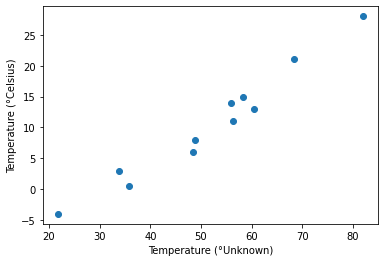

In [ ]:
# Plot the readings.
fig = plt.figure()
plt.xlabel("Temperature (°Unknown)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u, t_c, "o")
plt.show()

In [ ]:
# Chap 5 idea was: approximate with a linear function 
def model(t_u, w, b):
  return w * t_u + b 

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# We adjusted w, b to minimize loss.

# In general, w can be matrix, b can be vector... 
# But we want more than linear approximation!

![](https://drive.google.com/uc?export=view&id=1E_k1d3IEnrsWc6KHA5st4qDm2WaP2F6a)

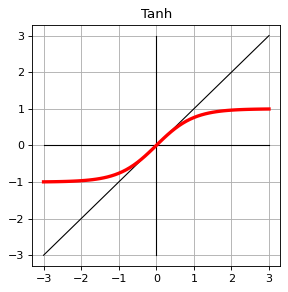

In [ ]:
# Several layers of linear approximation. 
# However, we want to approximate any function (not just linear functions!) 
# Also, we want to keep convergence in check.
#
# When passing from one layer to another, we will use an activation function

input_t = torch.arange(-3, 3.1, 0.1)
fig = plt.figure(figsize=(4, 4), dpi=80)

# The activation function
activation_func = nn.Tanh()

output_t = activation_func(input_t)
plt.grid()
plt.title(type(activation_func).__name__)
plt.plot([-3,3], [0,0], 'k', linewidth=1) # 'k' for black
plt.plot([0,0], [-3,3], 'k', linewidth=1)
plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3) # 'r' for red
plt.show()


In [ ]:
# Basic building block of neural net is the neuron

![](https://drive.google.com/uc?export=view&id=1-_6GevjGZbo6BVENFcwKO0GaGAvQ7hMm)

In [ ]:
# Composing a multilayer network. Here w_0, w_1... are matrices, 
# and b_0, b_1, ... are vectors
#
# activation_func = nn.Tanh()
#
# x_1 = activation_func(w_0 * x + b_0)
# x_2 = activation_func(w_1 * x_1 + b_1)
# ...

# y = activation_func(w_n * x_n + b_n)

![](https://drive.google.com/uc?export=view&id=12ypZVnhUlWf8nOSGolT6m7Mc4rNK0OwZ)

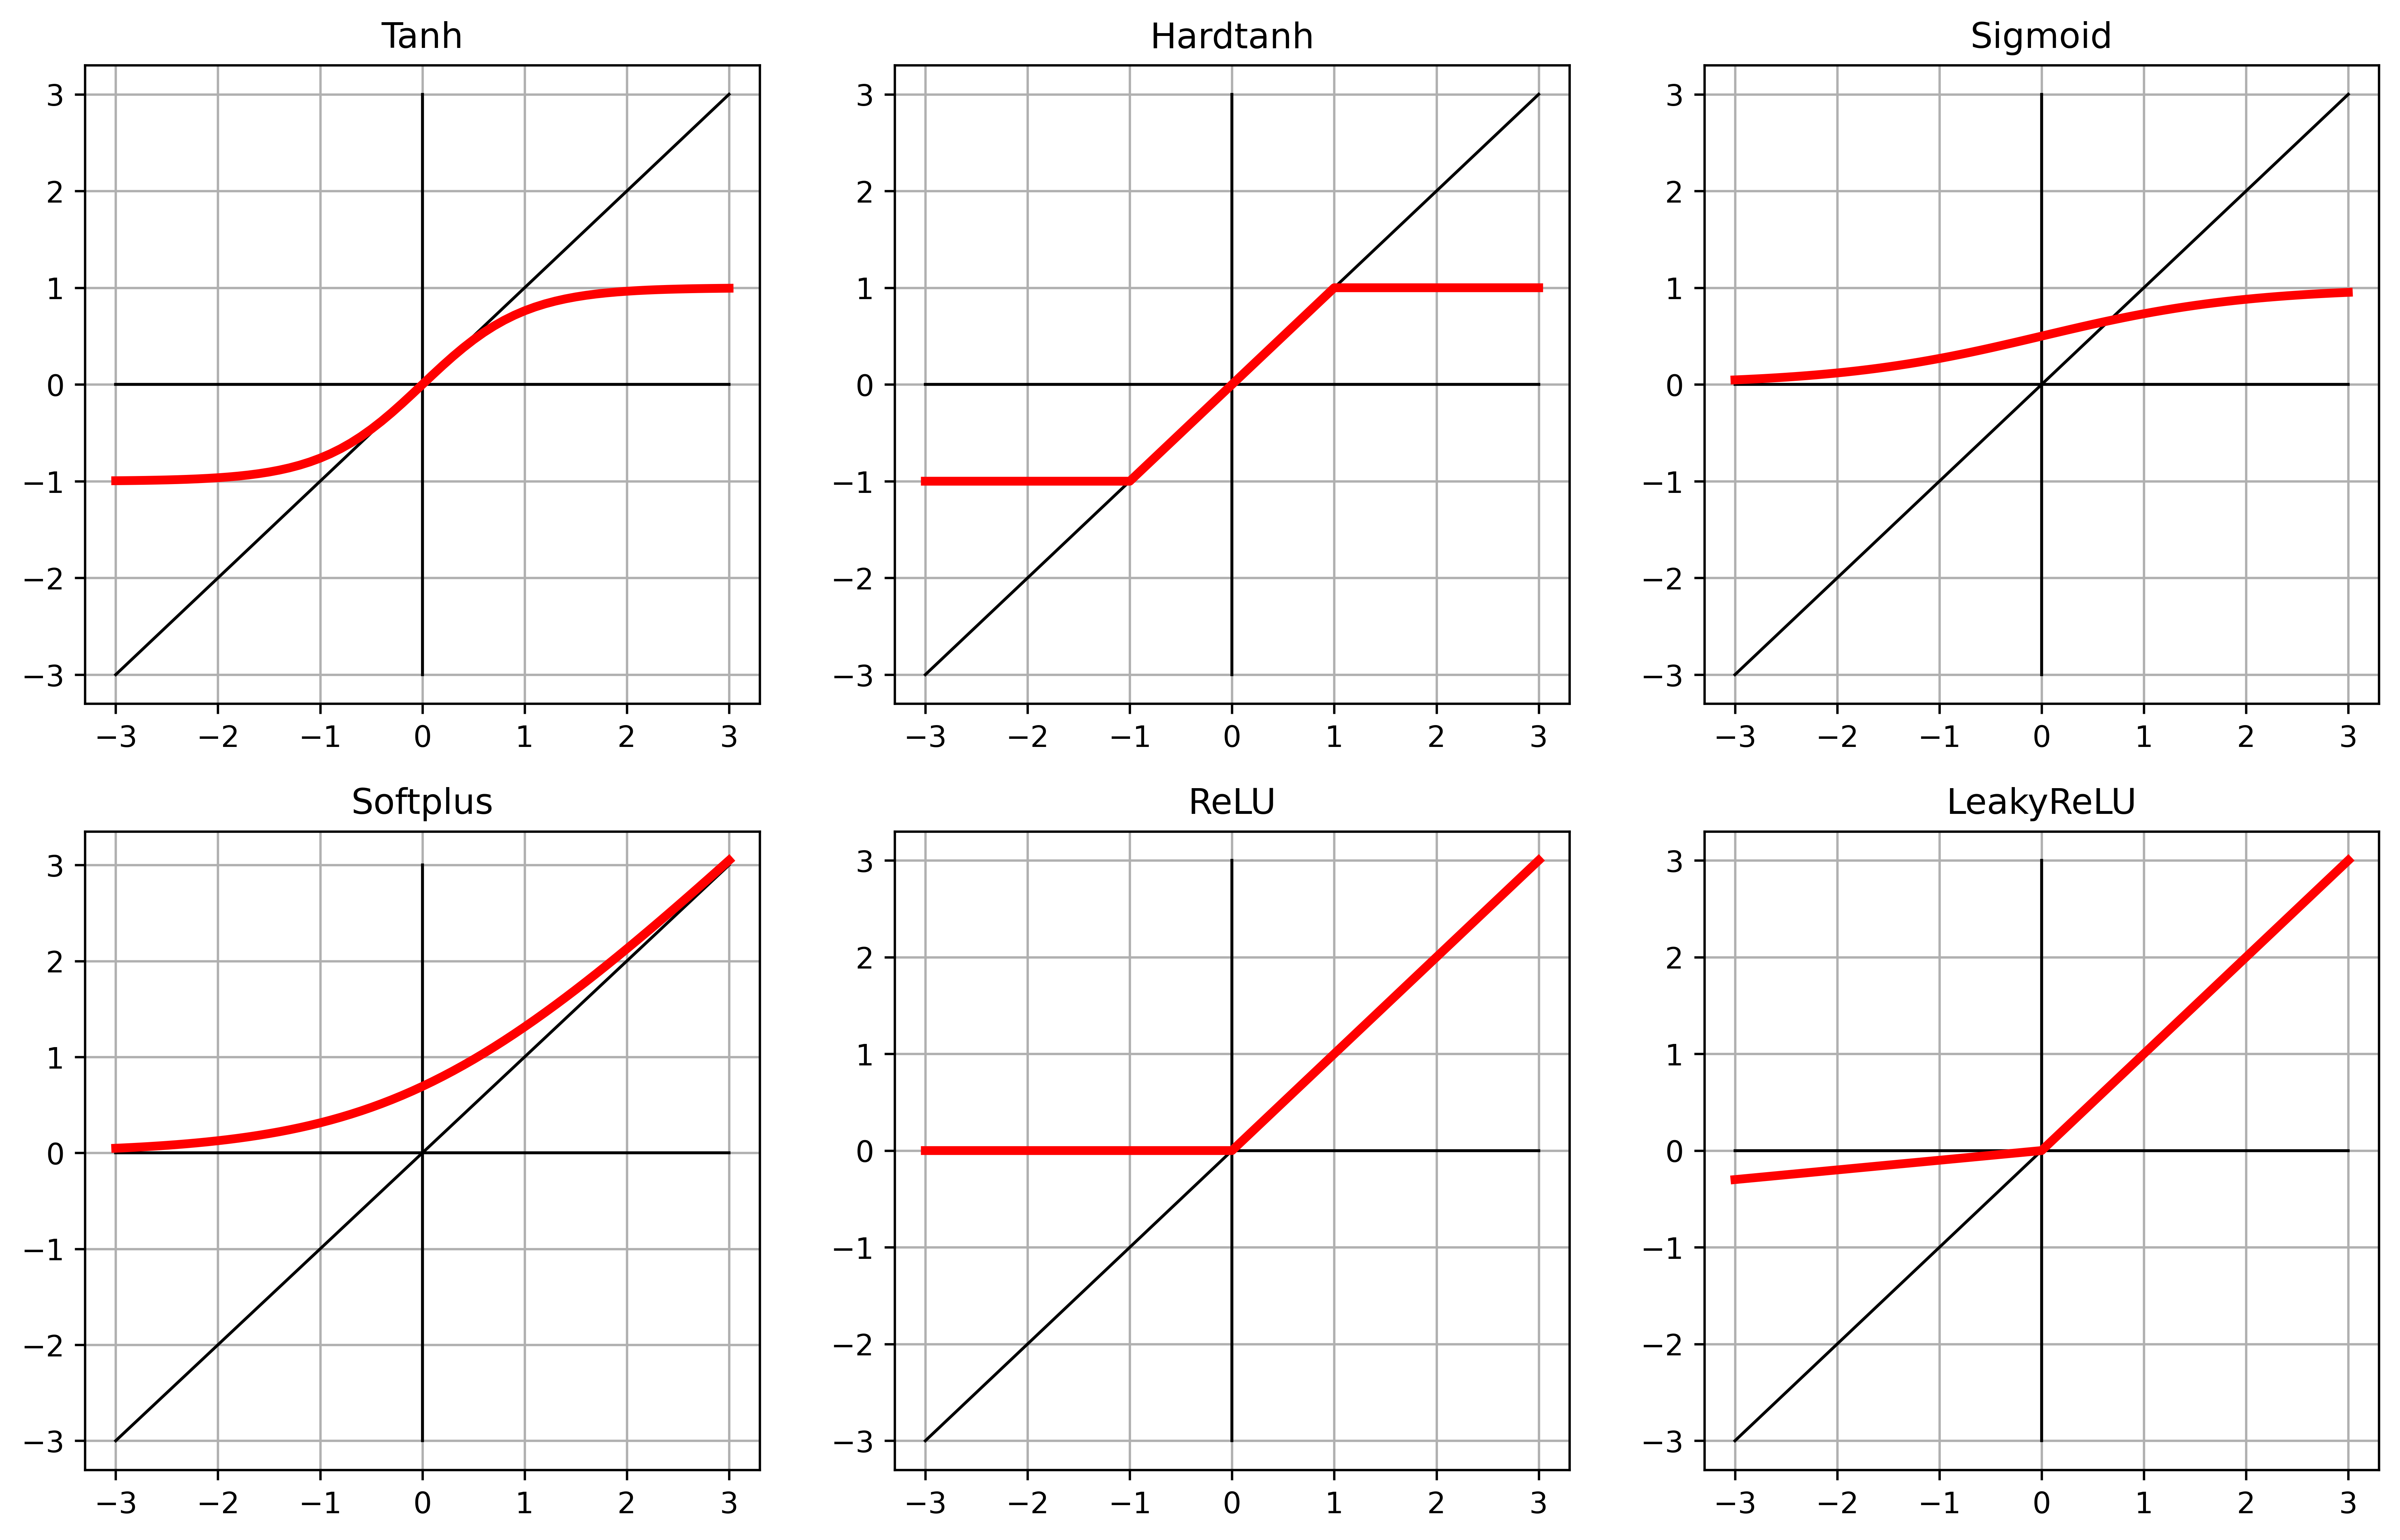

In [ ]:
# The error function in the temperature model was convex. This means it had a single minimum.
#
# In general, a neural network will not have a convex error function (due to the activation function). 
# Multiple local minima are possible.
#
# Role of activation function:
#  - In the inner parts of the model, it allows the output function to have different
#  slopes at different values—something a linear function by definition cannot do.
#  By  'patching'  these  differently  sloped  parts  for  many  outputs,  neural
#  networks can approximate arbitrary functions
#  - At the last layer of the network, it has the role of concentrating the outputs of
#  the preceding linear operation into a given range
#
# Examples of activation functions:
activation_list = [
    nn.Tanh(),
    nn.Hardtanh(),
    nn.Sigmoid(),
    
    nn.Softplus(),
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=0.1),

    #nn.Tanhshrink(),
    #nn.Softshrink(),
    #nn.Hardshrink(),
]

fig = plt.figure(figsize=(14, 28), dpi=600)

for i, activation_func in enumerate(activation_list):
    subplot = fig.add_subplot(len(activation_list), 3, i+1)
    subplot.set_title(type(activation_func).__name__)
    
    output_t = activation_func(input_t)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)


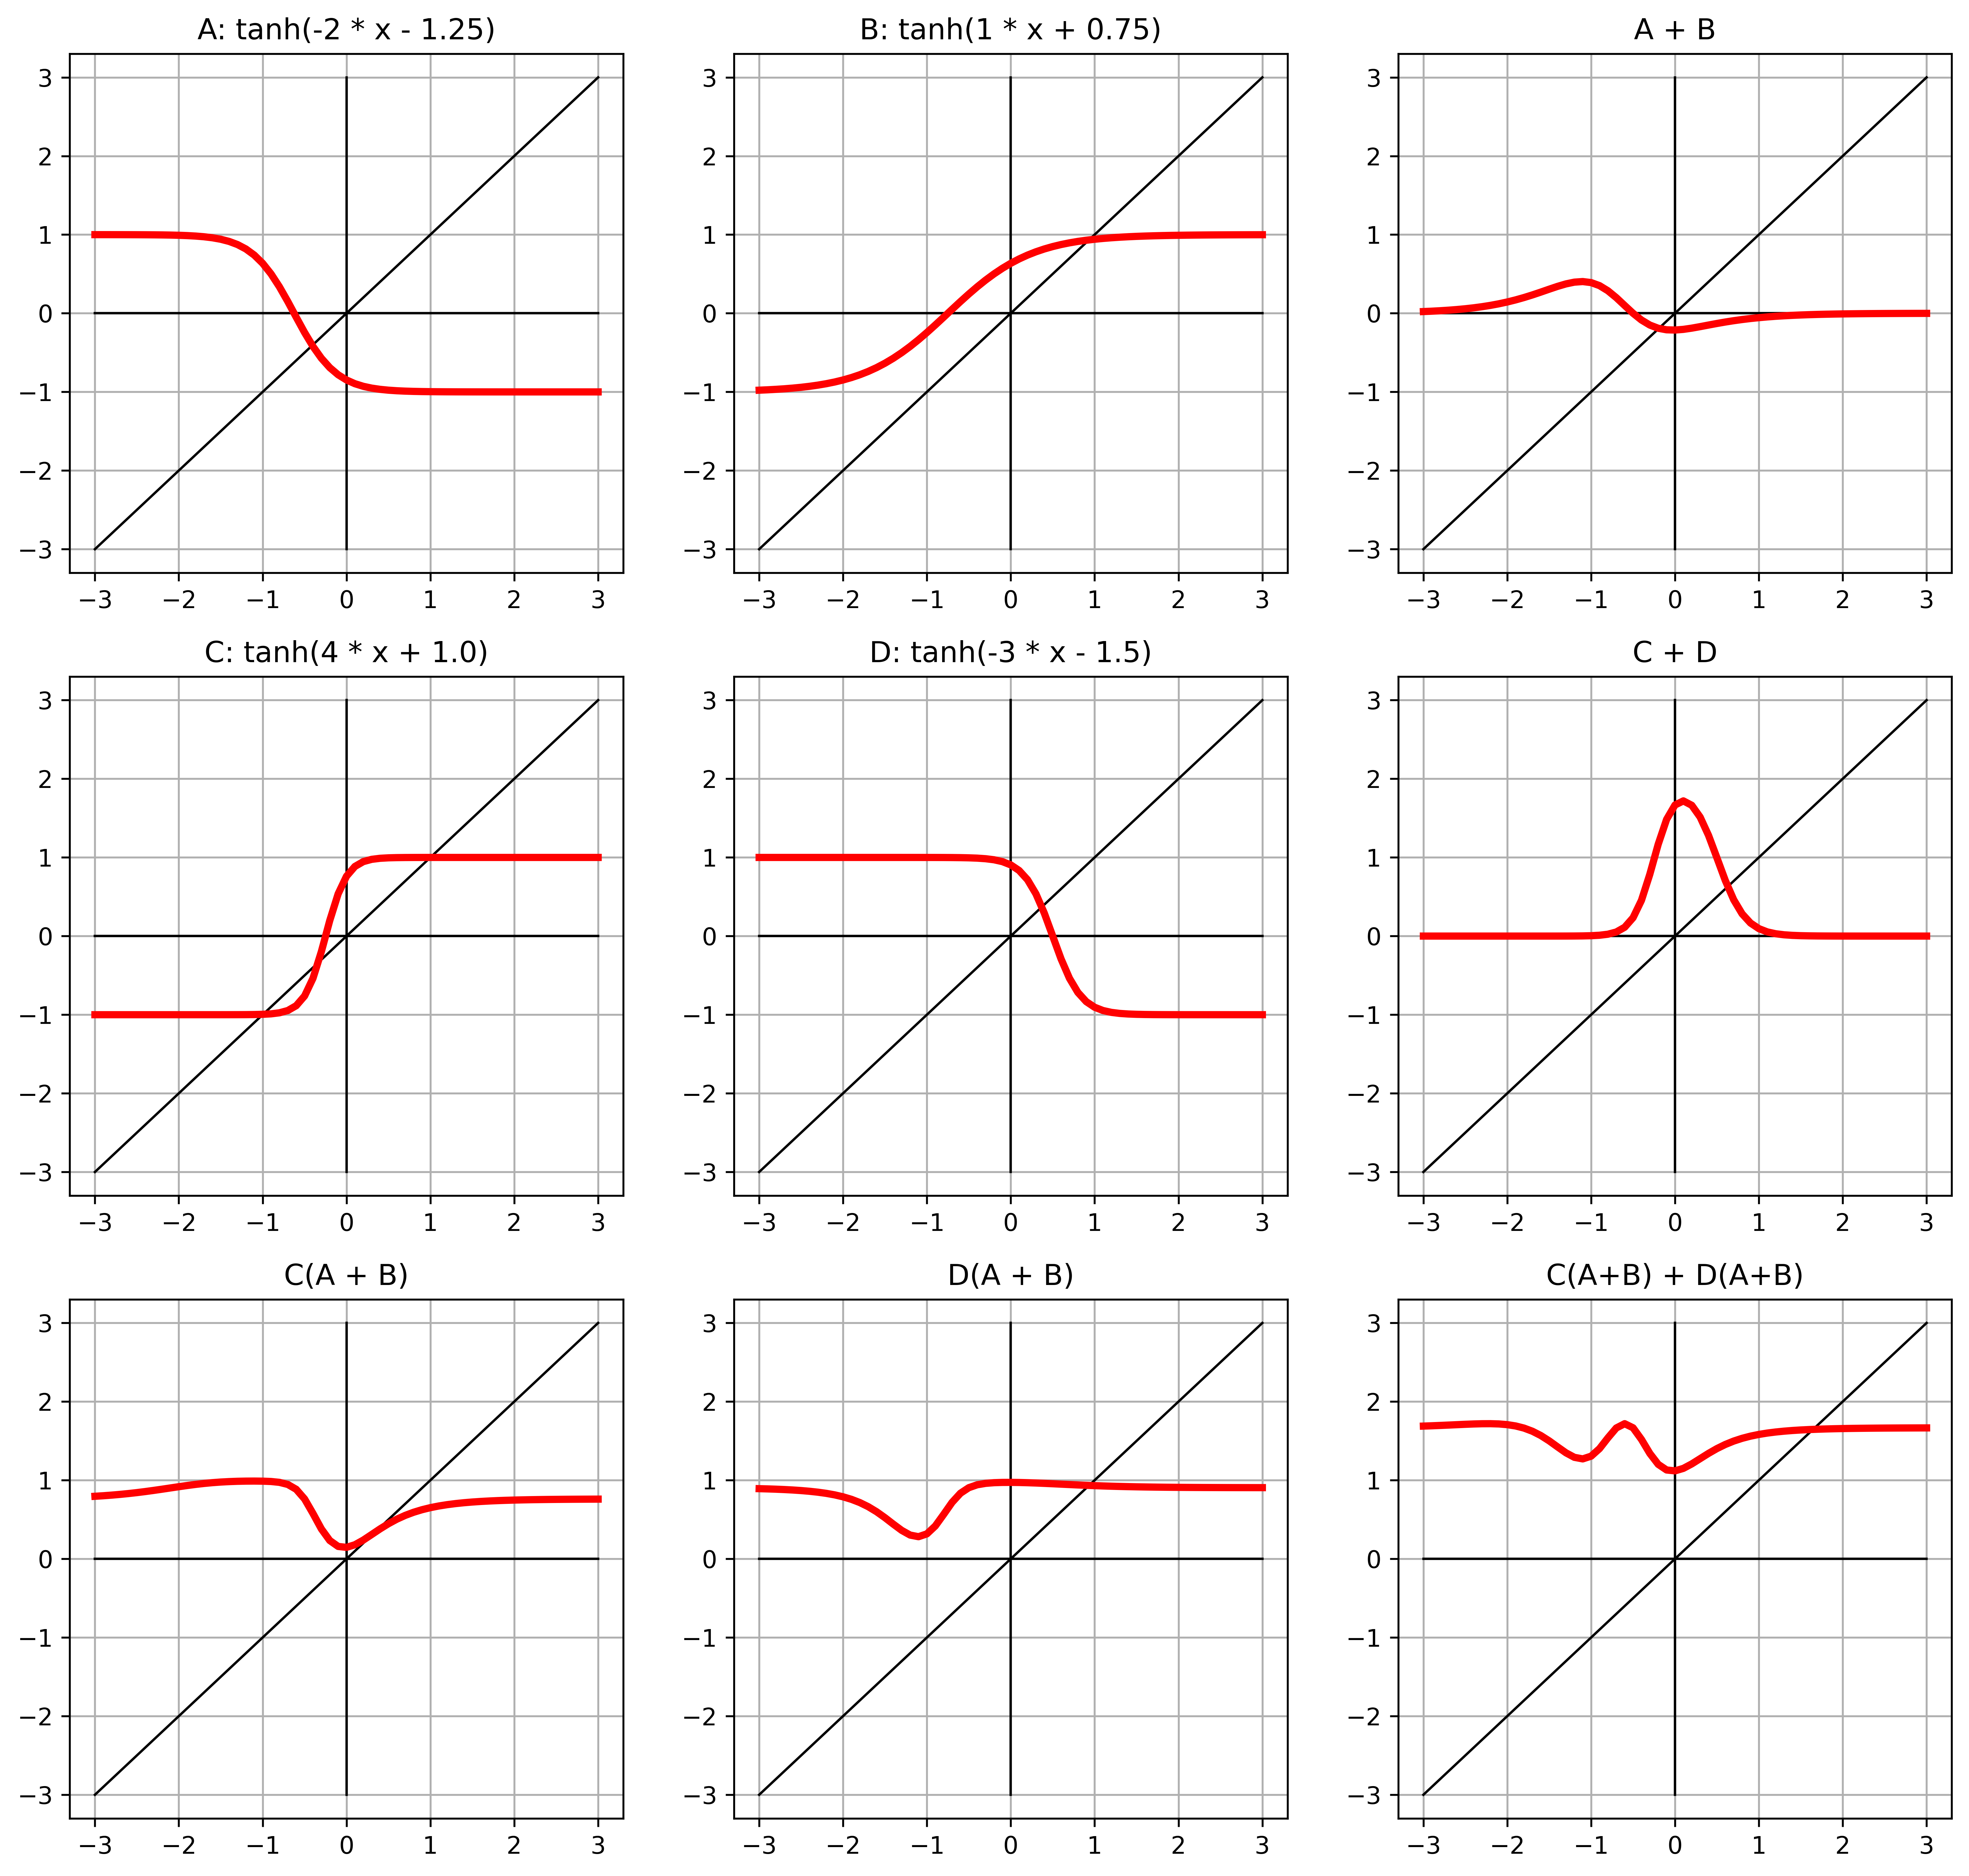

In [ ]:
# Compositions of linear and activation functions
a = lambda x: nn.Tanh()(-2 * x - 1.25)
b = lambda x: nn.Tanh()( 1 * x + 0.75)
c = lambda x: nn.Tanh()( 4 * x + 1.)
d = lambda x: nn.Tanh()(-3 * x + 1.5)

wb_list = [
    ('A: tanh(-2 * x - 1.25)', a(input_t)),
    ('B: tanh(1 * x + 0.75)', b(input_t)),
    ('A + B', a(input_t) + b(input_t)),

    ('C: tanh(4 * x + 1.0)', c(input_t)),
    ('D: tanh(-3 * x - 1.5)', d(input_t)),
    ('C + D', c(input_t) + d(input_t)),

    ('C(A + B)', c(a(input_t) + b(input_t))),
    ('D(A + B)', d(a(input_t) + b(input_t))),
     
    ('C(A+B) + D(A+B)', 
     c(a(input_t) + b(input_t)) + d(a(input_t) + b(input_t))),
]

fig = plt.figure(figsize=(14, 42), dpi=600)

for i, (title_str, output_t) in enumerate(wb_list):
    subplot = fig.add_subplot(len(wb_list), 3, i+1)
    subplot.set_title(title_str)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)


In [ ]:
# Use unsqueeze to add extra dimension. 
# This makes samples, values of the right dimension for nn.Linear(1, 1)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # Add extra dimension: [[.5], [14.0],...]
t_u = torch.tensor(t_u).unsqueeze(1) # Ditto

t_c.shape

torch.Size([11, 1])

In [ ]:
# Break indices into training and valuation set
n_samples = t_u.shape[0] # 11
n_val = int(0.2 * n_samples) # 2

shuffled_indices = torch.randperm(n_samples) # Random permutation

train_indices = shuffled_indices[:-n_val] # Training set has n_samples-2 elements
val_indices = shuffled_indices[-n_val:] # Valuation set has last 2 elements

train_indices, val_indices

(tensor([1, 4, 0, 8, 5, 9, 3, 6, 2]), tensor([ 7, 10]))

In [ ]:
t_u_train = t_u[train_indices] # Training samples
t_c_train = t_c[train_indices] # Training values

t_u_val = t_u[val_indices] # Valuation samples
t_c_val = t_c[val_indices] # Valuation values

In [ ]:
# Create a linear model. 
# It is randomly initialized. Re-running it gives new values.
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_u_train) # Model applied to training samples

tensor([[-53.3113],
        [-53.6921],
        [-34.0817],
        [-46.1716],
        [-46.6476],
        [-57.5951],
        [-78.0622],
        [-32.3682],
        [-55.5008]], grad_fn=<AddmmBackward0>)

In [ ]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[0.2376]], requires_grad=True), Parameter containing:
 tensor([-0.4020], requires_grad=True))

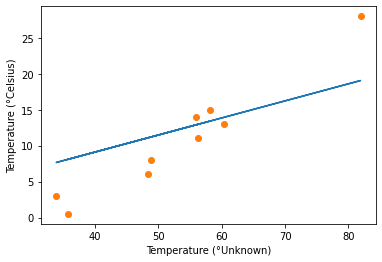

In [ ]:
fig = plt.figure()
plt.xlabel("Temperature (°Unknown)")
plt.ylabel("Temperature (°Celsius)")
# Need to detach() pytorch array before auto-conversion to numpy.
# detach() will remove the computation graph.
plt.plot(t_u_train, linear_model(t_u_train).detach()) 
plt.plot(t_u_train, t_c_train, "o")
plt.show()

# Repeat evaluating previous block; get different linear 'initial approximation'

The `model()` is implemented by `model.__call__()`.

Note: `model()` does `model.forward()`, but also calls some pre-hooks 
and post-hooks before/after calling `model.forward()`; you should
always call `model()` instead of `model.forward()`.

In [ ]:
# Model optimizer
import torch.optim as optim

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

# What are parameters?
linear_model.parameters() # A generator
# list(linear_model.parameters()) # 'Walk' the generator

<generator object Module.parameters at 0x7f5378e654d0>

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val, log_epochs=0):
    for epoch in range(n_epochs):
        t_p_train = model(t_u_train) # Compute function (forward pass)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # Compute function (forward pass)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # Compute gradient (backward pass)
        optimizer.step() 

        if log_epochs is not 0 and ((epoch+1) % log_epochs == 0 or (epoch+1) == n_epochs):
            w = float(model.weight[0][0])
            b = float(model.bias[0])
            print(f"Epoch {epoch+1}, w {w:.3f}, b {b:.3f},"
                  f" training loss {loss_train.item():.3f},"
                  f" validation loss {loss_val.item():.3f}")


In [ ]:
# What is different from the Chap 5 notebook?
#
# - Samples, values are broken into training batch and validation batch.
# 
# - linear_model = nn.Linear(1, 1) model is used instead of handcrafted 
# implementation of model(t_u, w, b)
# 
# - Instead of computing the gradient and the learning update step by hand, 
# now the gradient and the learning step are computed by 
# optim.SGD(linear_model.parameters(), lr=1e-2)

In [ ]:
# Re-create the linear model and the optimizer
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-4) # If lr higher, it will diverge

training_loop(
    n_epochs = 200000, # Need that many epochs with SGD
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_u_train,
    t_u_val = t_u_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    log_epochs=20000)

Epoch 20000, w 0.295, b -3.898, training loss 15.715, validation loss 32.473
Epoch 40000, w 0.350, b -7.027, training loss 10.794, validation loss 18.905
Epoch 60000, w 0.394, b -9.487, training loss 7.753, validation loss 11.137
Epoch 80000, w 0.428, b -11.420, training loss 5.875, validation loss 6.822
Epoch 100000, w 0.455, b -12.939, training loss 4.714, validation loss 4.535
Epoch 120000, w 0.476, b -14.134, training loss 3.997, validation loss 3.421
Epoch 140000, w 0.492, b -15.073, training loss 3.554, validation loss 2.967
Epoch 160000, w 0.505, b -15.810, training loss 3.281, validation loss 2.871
Epoch 180000, w 0.515, b -16.391, training loss 3.112, validation loss 2.957
Epoch 200000, w 0.523, b -16.847, training loss 3.007, validation loss 3.124


In [ ]:
# Use Adam optimizer
linear_model = nn.Linear(1, 1)
optimizer = optim.Adam(linear_model.parameters(), lr=1e-1) # Better optimizer

training_loop(
    n_epochs = 2000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # Mean standard error already available in torch
    t_u_train = t_u_train,
    t_u_val = t_u_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    log_epochs=200)

Epoch 200, w 0.366, b -7.926, training loss 9.649, validation loss 15.933
Epoch 400, w 0.479, b -14.341, training loss 3.902, validation loss 3.314
Epoch 600, w 0.532, b -17.345, training loss 2.923, validation loss 3.404
Epoch 800, w 0.549, b -18.286, training loss 2.842, validation loss 4.224
Epoch 1000, w 0.552, b -18.488, training loss 2.839, validation loss 4.449
Epoch 1200, w 0.553, b -18.517, training loss 2.839, validation loss 4.484
Epoch 1400, w 0.553, b -18.520, training loss 2.839, validation loss 4.487
Epoch 1600, w 0.553, b -18.521, training loss 2.839, validation loss 4.488
Epoch 1800, w 0.553, b -18.521, training loss 2.839, validation loss 4.488
Epoch 2000, w 0.553, b -18.521, training loss 2.839, validation loss 4.488


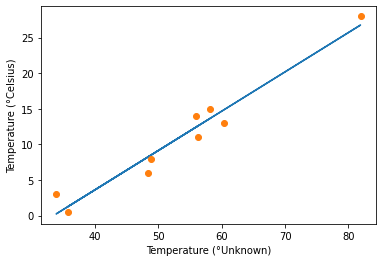

In [ ]:
# Graph it
fig = plt.figure()
plt.xlabel("Temperature (°Unknown)")
plt.ylabel("Temperature (°Celsius)")
# Need to detach() pytorch array before auto-conversion to numpy
plt.plot(t_u_train, linear_model(t_u_train).detach()) 
plt.plot(t_u_train, t_c_train, "o")
plt.show()

In [ ]:
# Replace the linear model with a neural net
# with a hidden layer

![](https://drive.google.com/uc?export=view&id=1VEw8gMb_wbCc5dOKVLu2bMqB7634UTju)

In [ ]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # We chose 13 arbitrarily. 
            nn.Tanh(),
            nn.Linear(13, 1) # Needs to match 13 above
            ) 
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
# Inspecting the parameters
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
# We can print the parameters
for name, param in seq_model.named_parameters():
    print(name, param.shape)

# 0.weight of shape [13, 1] and not [13] b/c 
# it has shape compatible with multiple inputs
# (don't want shape to be [13, N] when N>1 and merely [13] when N==1)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
# Sequential also accepts an OrderedDict, in
# which we can name each module passed to Sequential:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
# We can print the parameters
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
# Change training loop to not print weight & bias.
def training_loop2(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val, log_epochs=0):
    for epoch in range(n_epochs):
        t_p_train = model(t_u_train) # Compute function (forward pass)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # Compute function (forward pass)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # Compute gradient (backward pass)
        optimizer.step() 

        if log_epochs is not 0 and ((epoch+1) % log_epochs == 0 or (epoch+1) == n_epochs):
            print(f"Epoch {epoch+1},"
                  f" training loss {loss_train.item():.3f},"
                  f" validation loss {loss_val.item():.3f}")
            #print(seq_model.hidden_linear.weight)
            #print(seq_model.output_linear)


In [ ]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop2(
    n_epochs = 200000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(), # Mean standard error already available in torch
    t_u_train = 0.1 * t_u_train, # Does not converge w/o .1 scale
    t_u_val = 0.1 * t_u_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    log_epochs=20000)

Epoch 20000, training loss 2.021, validation loss 5.222
Epoch 40000, training loss 1.870, validation loss 9.085
Epoch 60000, training loss 1.696, validation loss 13.681
Epoch 80000, training loss 1.576, validation loss 17.585
Epoch 100000, training loss 1.499, validation loss 20.736
Epoch 120000, training loss 1.441, validation loss 23.863
Epoch 140000, training loss 1.382, validation loss 28.289
Epoch 160000, training loss 1.326, validation loss 34.956
Epoch 180000, training loss 1.251, validation loss 50.037
Epoch 200000, training loss 1.179, validation loss 64.608


In [ ]:
# Notice large validation loss - overfitting

In [ ]:
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

optimizer = optim.Adam(seq_model.parameters(), lr=1e-2)
training_loop2(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(), # Mean standard error already available in torch
    t_u_train = 1 * t_u_train,
    t_u_val = 1 * t_u_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val,
    log_epochs=1000)

Epoch 1000, training loss 5.391, validation loss 26.982
Epoch 2000, training loss 1.650, validation loss 16.765
Epoch 3000, training loss 1.494, validation loss 21.038
Epoch 4000, training loss 1.435, validation loss 25.356
Epoch 5000, training loss 1.406, validation loss 29.013
Epoch 6000, training loss 1.393, validation loss 31.578
Epoch 7000, training loss 1.385, validation loss 33.065
Epoch 8000, training loss 1.382, validation loss 34.427
Epoch 9000, training loss 1.381, validation loss 35.287
Epoch 10000, training loss 1.379, validation loss 35.800


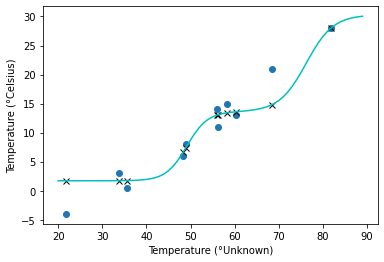

In [ ]:
t_range = torch.arange(20., 90.).unsqueeze(1)

# Graph it
fig = plt.figure()
plt.xlabel("Temperature (°Unknown)")
plt.ylabel("Temperature (°Celsius)")
# Need to detach() pytorch array before auto-conversion to numpy
plt.plot(t_u, t_c, "o")
plt.plot(t_u, seq_model(t_u).detach(), "kx") 
plt.plot(t_range, seq_model(t_range).detach(), "c-")
plt.show()